In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tested.csv to tested.csv


In [3]:

df = pd.read_csv('tested.csv')

In [4]:

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:


df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-5-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-6-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [7]:

label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:

y_pred = model.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



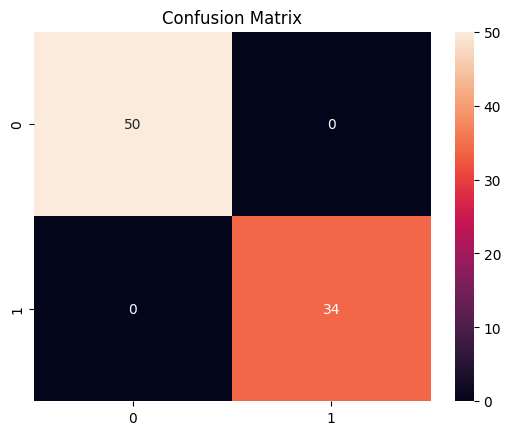

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [13]:
def predict_survival(model, passenger_info, label_encoders):
    """
    Predict survival for a single passenger.
    """
    df = pd.DataFrame([passenger_info])
    for col in ['Sex', 'Embarked']:
        if col in label_encoders:
            df[col] = label_encoders[col].transform(df[col])
    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    prediction = model.predict(df)[0]
    return 'Survived' if prediction == 1 else 'Did not survive'

In [14]:

for i in range(10):  # first 5 passengers
    row = df.iloc[i].drop('Survived')
    row_dict = row.to_dict()
    row_dict['Sex'] = label_encoders['Sex'].inverse_transform([int(row_dict['Sex'])])[0]
    row_dict['Embarked'] = label_encoders['Embarked'].inverse_transform([int(row_dict['Embarked'])])[0]

    prediction = predict_survival(model, row_dict, label_encoders)
    print(f"Passenger {i+1}: {prediction}")

Passenger 1: Did not survive
Passenger 2: Survived
Passenger 3: Did not survive
Passenger 4: Did not survive
Passenger 5: Survived
Passenger 6: Did not survive
Passenger 7: Survived
Passenger 8: Did not survive
Passenger 9: Survived
Passenger 10: Did not survive
